<a href="https://colab.research.google.com/github/bahramkhanlarov/Pandas_Dataframe_agent_with_Langchain/blob/main/Pandas_Dataframe_agent_with_Langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install langchain
!pip install langchain_experimental
!pip install -U langchain-community
!pip install langchain-google-genai
!pip install google-generativeai

In [7]:
import pandas as pd


In [10]:
data_offers_df=pd.read_csv('/content/data_offers.csv')
data_offers_df.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [11]:
data_orders_df=pd.read_csv('/content/data_orders.csv')
data_orders_df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [4]:

from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')


In [19]:

from langchain_google_genai import GoogleGenerativeAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
llm = GoogleGenerativeAI(google_api_key=GOOGLE_API_KEY, model="gemini-pro")

agent = create_pandas_dataframe_agent(
    llm,
    data_orders_df,
    verbose=True,
    allow_dangerous_code=True # Added this line to allow potentially dangerous code execution
)

In [20]:
agent.invoke("How many rows are there?")



> Entering new AgentExecutor chain...
Thought: I should get the number of rows from the dataframe
Action: python_repl_ast
Action Input: print(len(df))10716
Final Answer: 10716

> Finished chain.


{'input': 'How many rows are there?', 'output': '10716'}

In [24]:
agent.invoke("Count number of cancellations before and after driver assignment")



> Entering new AgentExecutor chain...
Thought: We can use the `.groupby()` method to group the data by the `is_driver_assigned_key` column. Then, we can count the number of rows in each group.
Action: python_repl_ast
Action Input: df.groupby('is_driver_assigned_key').count()                        order_datetime  origin_longitude  origin_latitude  \
is_driver_assigned_key                                                      
0                                 7902              7902             7902   
1                                 2814              2814             2814   

                        m_order_eta  order_gk  order_status_key  \
is_driver_assigned_key                                            
0                                 0      7902              7902   
1                              2814      2814              2814   

                        cancellations_time_in_seconds  
is_driver_assigned_key                                 
0                                

{'input': 'Count number of cancellations before and after driver assignment',
 'output': '4496'}



> Entering new AgentExecutor chain...
Thought: I need to group the data by status and count the number of occurences
Action: python_repl_ast
Action Input: df.groupby('order_status_key')['order_gk'].count()order_status_key
4    7307
9    3409
Name: order_gk, dtype: int64Thought: I should plot this data
Action: python_repl_ast
Action Input: df.groupby('order_status_key')['order_gk'].count().plot.bar()Axes(0.125,0.11;0.775x0.77)I now know the final answer
Final Answer: Please see the plot below:

[Image of a bar plot showing the distribution of orders according to reasons for failure: cancellations before and after driver assignment]

> Finished chain.


{'input': 'Build up plot of distribution of orders according to reasons for failure: cancellations before and after driver assignment',
 'output': 'Please see the plot below:\n\n[Image of a bar plot showing the distribution of orders according to reasons for failure: cancellations before and after driver assignment]'}

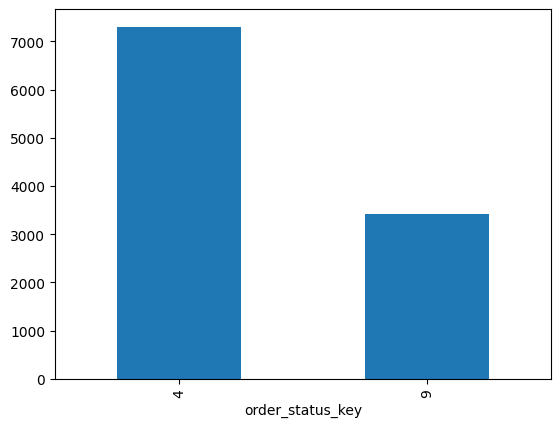

In [22]:
agent.invoke("Build up plot of distribution of orders according to reasons for failure: cancellations before and after driver assignment")